# 简单的车道线检测

##### 此notebook为首次尝试，主要目的熟悉使用opencv对图像做检测，选用了路况较为简单的高速路图片

In [89]:
import matplotlib.pyplot as plt
import matplotlib.image as mplimg
import numpy as np
import cv2

## 1.原图

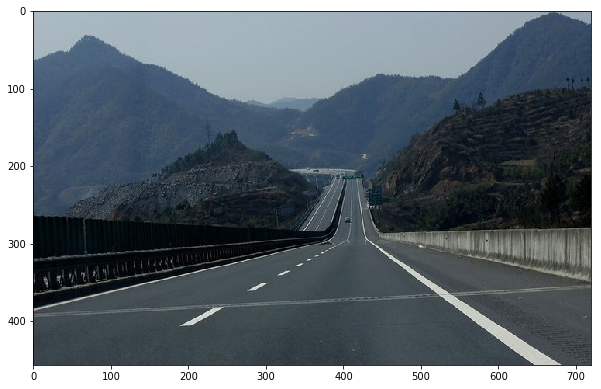

In [90]:
img = mplimg.imread('highway.jpg')
plt.figure(figsize=(10,10))
plt.imshow(img)

## 2.灰度图

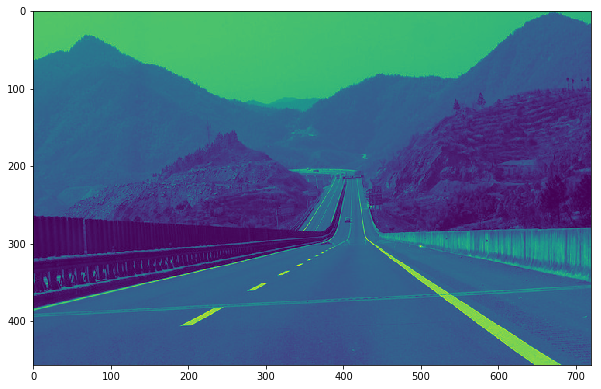

In [91]:
'''
1.灰度图读出偏绿色，原因暂未知，如下代码可获得灰色图片：
    for i in range(375):
        for j in range(1242):
            img[i,j] = (img[i,j,0]+img[i,j,1]+img[i,j,2]) / 3
    print(img)
    plt.figure(figsize=(15,5))
    plt.imshow(img)
    gray = img
2.可用cv2.cvtColor()将原图转换为灰度图，但在做Canny edge detection时会报错"src_depth() == 0 in canny function"，原因暂未知。
'''

gray = cv2.imread('highway.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(gray)

## 3.高斯滤波

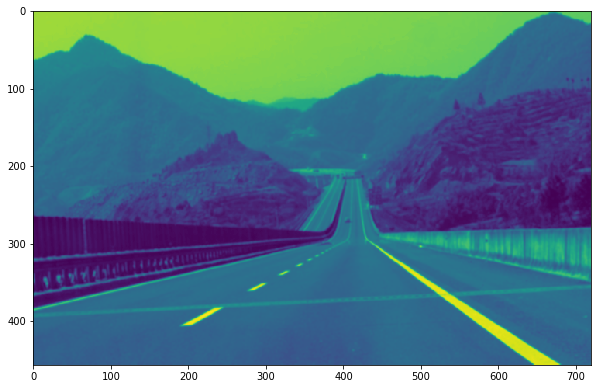

In [92]:
blur_ksize = 5
blur_gray = cv2.GaussianBlur(gray, (blur_ksize, blur_ksize), 0, 0)
plt.figure(figsize=(10,10))
plt.imshow(blur_gray)

## 4.Canny边界检测

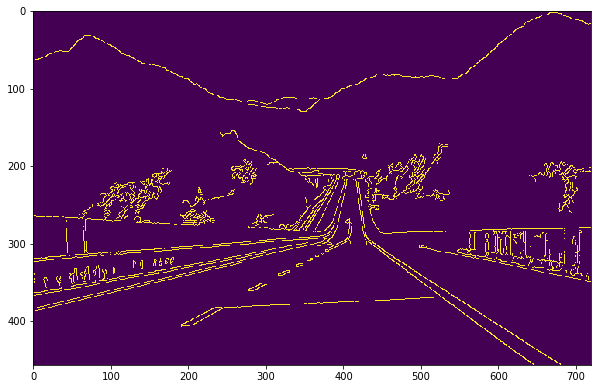

In [93]:
canny_lthreshold = 10  
canny_hthreshold = 150  
edges = cv2.Canny(blur_gray, canny_lthreshold, canny_hthreshold)
plt.figure(figsize=(10,10))
plt.imshow(edges)

## 5.Region of Interest (ROI)

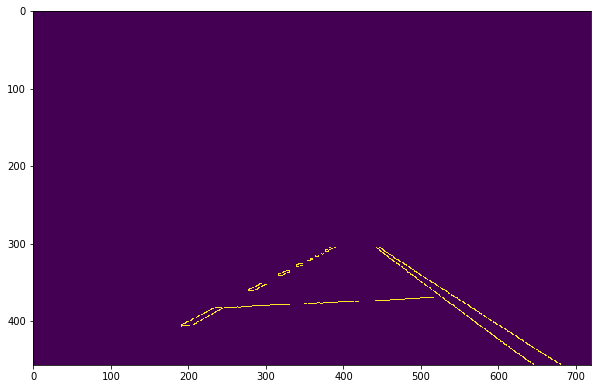

In [94]:
def roi_mask(img, vertices):
    
    mask = np.zeros_like(img)
    mask_color = 255
    cv2.fillPoly(mask,vertices,mask_color)
    masked_img = cv2.bitwise_and(img, mask)
    
    return masked_img

roi_vertices = np.array([[(0,edges.shape[0]),
                          (380,305),
                          (450,305),
                          (edges.shape[1],edges.shape[0])]])
roi_edges = roi_mask(edges, roi_vertices)

plt.figure(figsize=(10,10))
plt.imshow(roi_edges)

## 6.Hough Transformation

(14, 1, 4)
(457, 720)


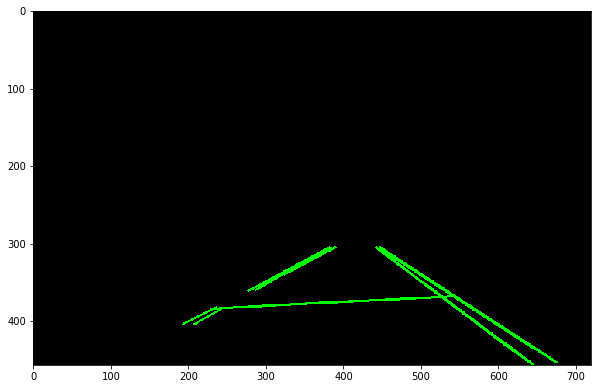

In [122]:
rho = 1
theta = np.pi/180
threshold = 15
min_line_len = 40
max_line_gap = 20

def draw_lines(img, lines, color = (0, 255, 0), thickness = 2):
    for line in lines:
        for x1,y1,x2,y2 in line:
            cv2.line(img, (x1,y1), (x2,y2), color, thickness)
            
def hough_lines(img, rho, theta, threshold, min_line_length, max_line_gap):
    lines = cv2.HoughLinesP(img, rho, theta, threshold, np.array([]),
                            minLineLength=min_line_len, 
                            maxLineGap=max_line_gap)
    print(lines.shape)
    print(img.shape)
    line_img = np.zeros((img.shape[0], img.shape[1], 3), dtype=np.uint8)
    draw_lines(line_img, lines)
    return line_img

line_img = hough_lines(roi_edges, rho, theta, threshold, min_line_length, max_line_gap)

plt.figure(figsize=(10,10))
plt.imshow(line_img)

## 7.对检测出的直线进行筛选和拟合

In [ ]:
def draw_fit_lines(img, lines):
    left_lines, right_lines = [], []
    for line in lines:
        for x1,y1,x2,y2 in line:
            k = (y2 - y1) / (x2 - x1)
            if k > 0:
                right_lines.append(line)
            else:
                left_lines.append(line)